### Set up IPython notebook environment first...

In [1]:
# Import path to source directory (bit of a hack in IPython)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, '../src'))

# And ensure modules are reloaded on any change (useful when developing code on the fly, etc)
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')  # for inline plots
import seaborn as sbn

In [3]:
from heur import ShootAndGo
from objfun import Zebra3

### Run ``maxeval`` vs ``hmax`` experiments

In [4]:
def experiment(M, maxevals, hmaxs):
    rows = []
    for maxeval in maxevals:
        for hmax in hmaxs:
            for i in range(M):
                heur = ShootAndGo(Zebra3(6), maxeval=maxeval, hmax=hmax)
                row = heur.search()
                row['maxeval'] = maxeval
                row['hmax'] = hmax
                rows.append(row)
    return pd.DataFrame(rows)

In [5]:
M = 200
maxevals = np.array([1000, 10000, 50000, 100000, 200000, np.inf])
hmaxs = np.array([0, 1, 5, 10, 50, np.inf])

In [6]:
## This way we can run experiments...
#%%time
#tab = experiment(M, maxevals, hmaxs)
#
## And save them into file for future analysis
#tab.to_csv('20160315_zebra_heatmap.csv')

In [7]:
# But now let's load them from file directly
tab = pd.read_csv('20160315_zebra_heatmap.csv')

In [8]:
tab.head()

,best_x,best_y,hmax,maxeval,neval
0,[1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0],0.4,0,1000,inf
1,[1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1],0.7,0,1000,inf
2,[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1],0.5,0,1000,inf
3,[0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0],0.4,0,1000,inf
4,[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0],0.7,0,1000,inf


### Analyze ``maxeval`` vs ``hmax`` experiment results

#### 1. Reliability

In [9]:
map_rel = tab.pivot_table(
    values=['neval'],
    index=['hmax'],
    columns=['maxeval'],
    aggfunc=lambda x: len(x[x<np.inf])/len(x)
)['neval']
map_rel

maxeval,1000.0,10000.0,50000.0,100000.0,200000.0,inf
hmax,,,,,,
0.000000,0.005,0.040,0.180,0.325,0.535,1
1.000000,0.005,0.085,0.145,0.315,0.495,1
5.000000,0.005,0.040,0.205,0.320,0.560,1
10.000000,0.000,0.030,0.130,0.350,0.515,1
50.000000,0.040,0.395,0.885,0.990,1.000,1
inf,0.175,0.815,1.000,1.000,1.000,1


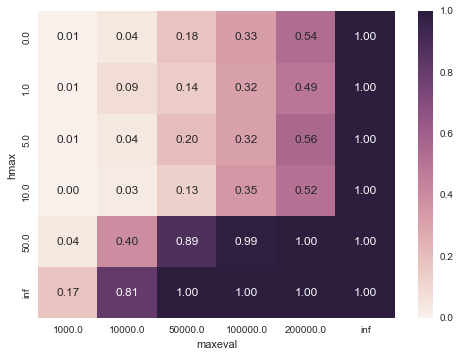

In [10]:
sbn.heatmap(map_rel, annot=True, fmt=".2f")

#### 2. Mean number of evaluations

In [11]:
map_mne = tab.pivot_table(
    values=['neval'],
    index=['hmax'],
    columns=['maxeval'],
    aggfunc=lambda x: np.mean(x[x<np.inf])
)['neval']
map_mne

maxeval,1000.0,10000.0,50000.0,100000.0,200000.0,inf
hmax,,,,,,
0.000000,120.000000,5567.000000,25381.333333,43366.553846,86868.635514,289162.785
1.000000,613.000000,4603.882353,20370.655172,49125.158730,84430.767677,259185.780
5.000000,997.000000,4328.750000,26423.000000,45890.812500,87214.857143,251612.375
10.000000,NaN,6628.500000,21728.307692,46594.257143,81591.310680,257525.395
50.000000,631.500000,4795.835443,13881.593220,15948.242424,22657.680000,20980.770
inf,558.571429,3621.539877,6362.995000,6103.440000,6604.360000,6229.625


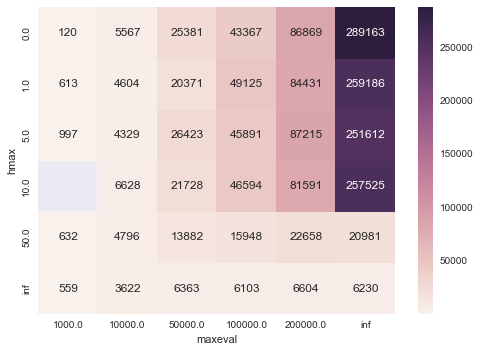

In [12]:
sbn.heatmap(map_mne, annot=True, fmt=".0f")

#### 3. Feoktistov criterion

In [13]:
map_feo = tab.pivot_table(
    values=['neval'],
    index=['hmax'],
    columns=['maxeval'],
    aggfunc=lambda x: np.NaN if len(x[x<np.inf])/len(x) ==0 else np.mean(x[x<np.inf])/(len(x[x<np.inf])/len(x))
)['neval']
map_feo

maxeval,1000.0,10000.0,50000.0,100000.0,200000.0,inf
hmax,,,,,,
0.000000,24000.000000,139175.000000,141007.407407,133435.550296,162371.281335,289162.785
1.000000,122600.000000,54163.321799,140487.277051,155952.884858,170567.207428,259185.780
5.000000,199400.000000,108218.750000,128892.682927,143408.789062,155740.816327,251612.375
10.000000,NaN,220950.000000,167140.828402,133126.448980,158429.729475,257525.395
50.000000,15787.500000,12141.355552,15685.416068,16109.335782,22657.680000,20980.770
inf,3191.836735,4443.607211,6362.995000,6103.440000,6604.360000,6229.625


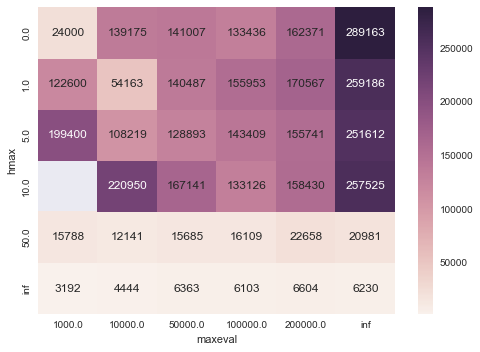

In [14]:
sbn.heatmap(map_feo, annot=True, fmt=".0f")